In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# EXPLORATORY DATA ANALYSIS

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
#from sklearn.naive_bayes import GaussianNB
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
#from sklearn.linear_model import LogisticRegression
#from sklearn.neural_network import MLPClassifier
from imblearn.metrics import geometric_mean_score

import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATASET

In [2]:

data = pd.read_csv('/kaggle/input/weather-australia/weatherAUS.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# BASIC INFORMATION LIKE SUMMARY OF DATASET, SUMMARY STATISTICS, MISSING VALUES IN EACH COLUMN

In [3]:
data.info()  # Summary of dataset (columns, data types, missing values)
data.describe()  # Summary statistics (mean, min, max, std, etc.)
data.isnull().sum()  # Count missing values in each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [20]:
# Data Defining for Visualization and Processing
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
categorical_columns = data.select_dtypes(exclude=np.number).columns.tolist()
categorical_columns.remove('RainTomorrow')
numeric_columns,categorical_columns

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'],
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [3]:
data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Select features and target
X = data.drop(['RainTomorrow'], axis=1)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Display missing values, numerical features, and categorical features separately
missing_values = X.isnull().sum()

# Print the results
print("Missing Values:\n", missing_values[missing_values > 0])  # Display missing values only for columns with missing data
print("\nNumerical Features:\n", numerical_features)
print("\nCategorical Features:\n", categorical_features)

Missing Values:
 MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
dtype: int64

Numerical Features:
 Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

Categorical Features:
 Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')


# MISSING VALUE HEATMAP

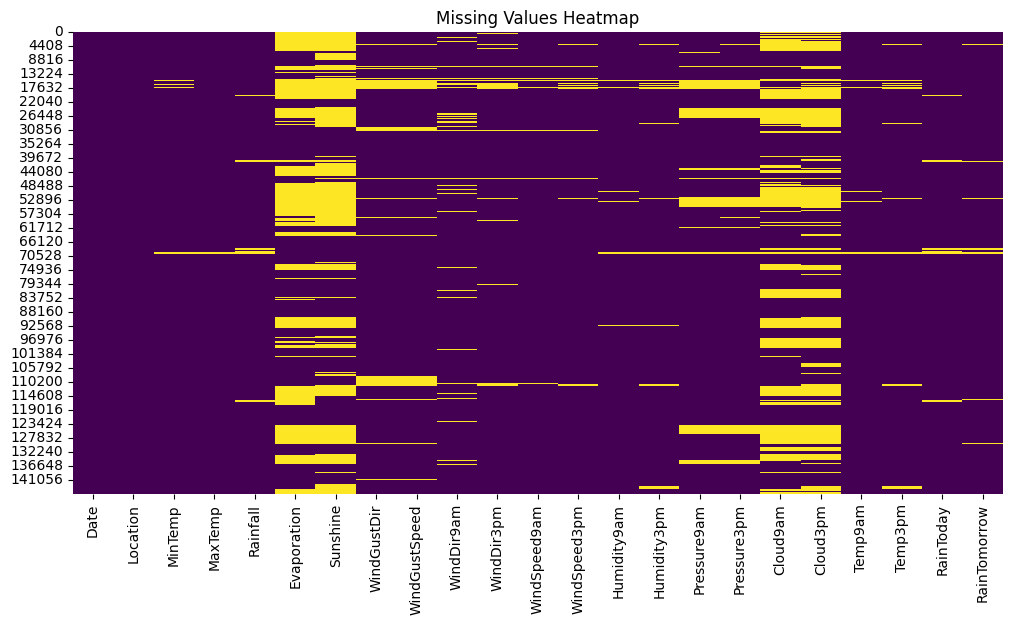

In [5]:
# Visualize missing data as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


# MISSING VALUES OF EACH FEATURES PICTORIALLY

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


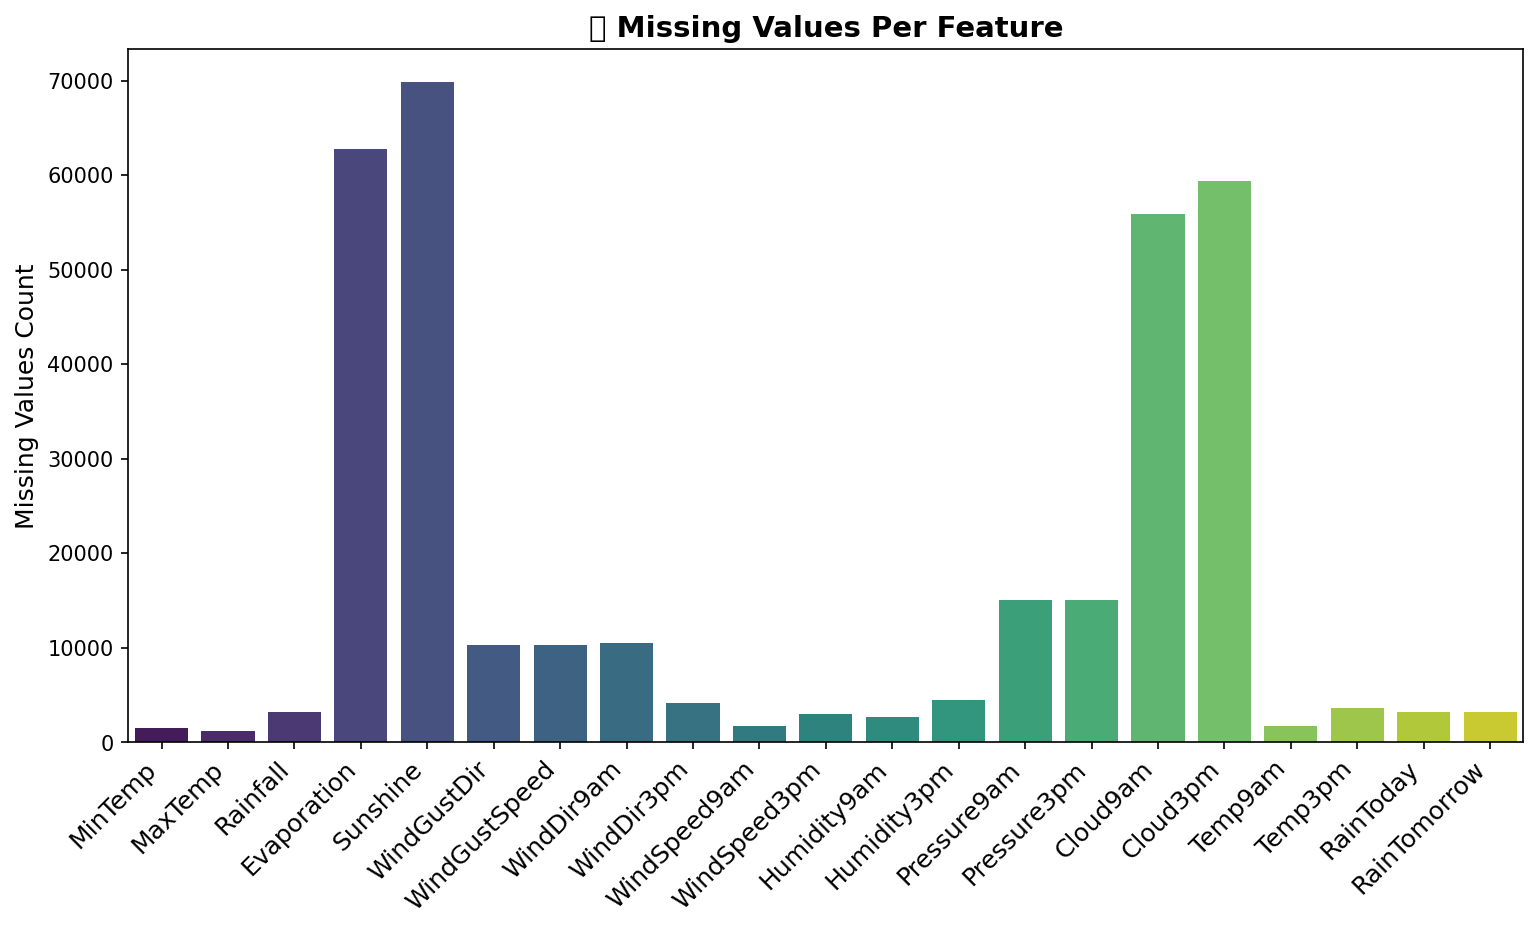

In [6]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x labels for clarity
plt.ylabel("Missing Values Count", fontsize=12)
plt.title("📊 Missing Values Per Feature", fontsize=14, fontweight='bold')
plt.show()


# DENDROGRAM FOR MISSING VALUES

<Figure size 1800x900 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


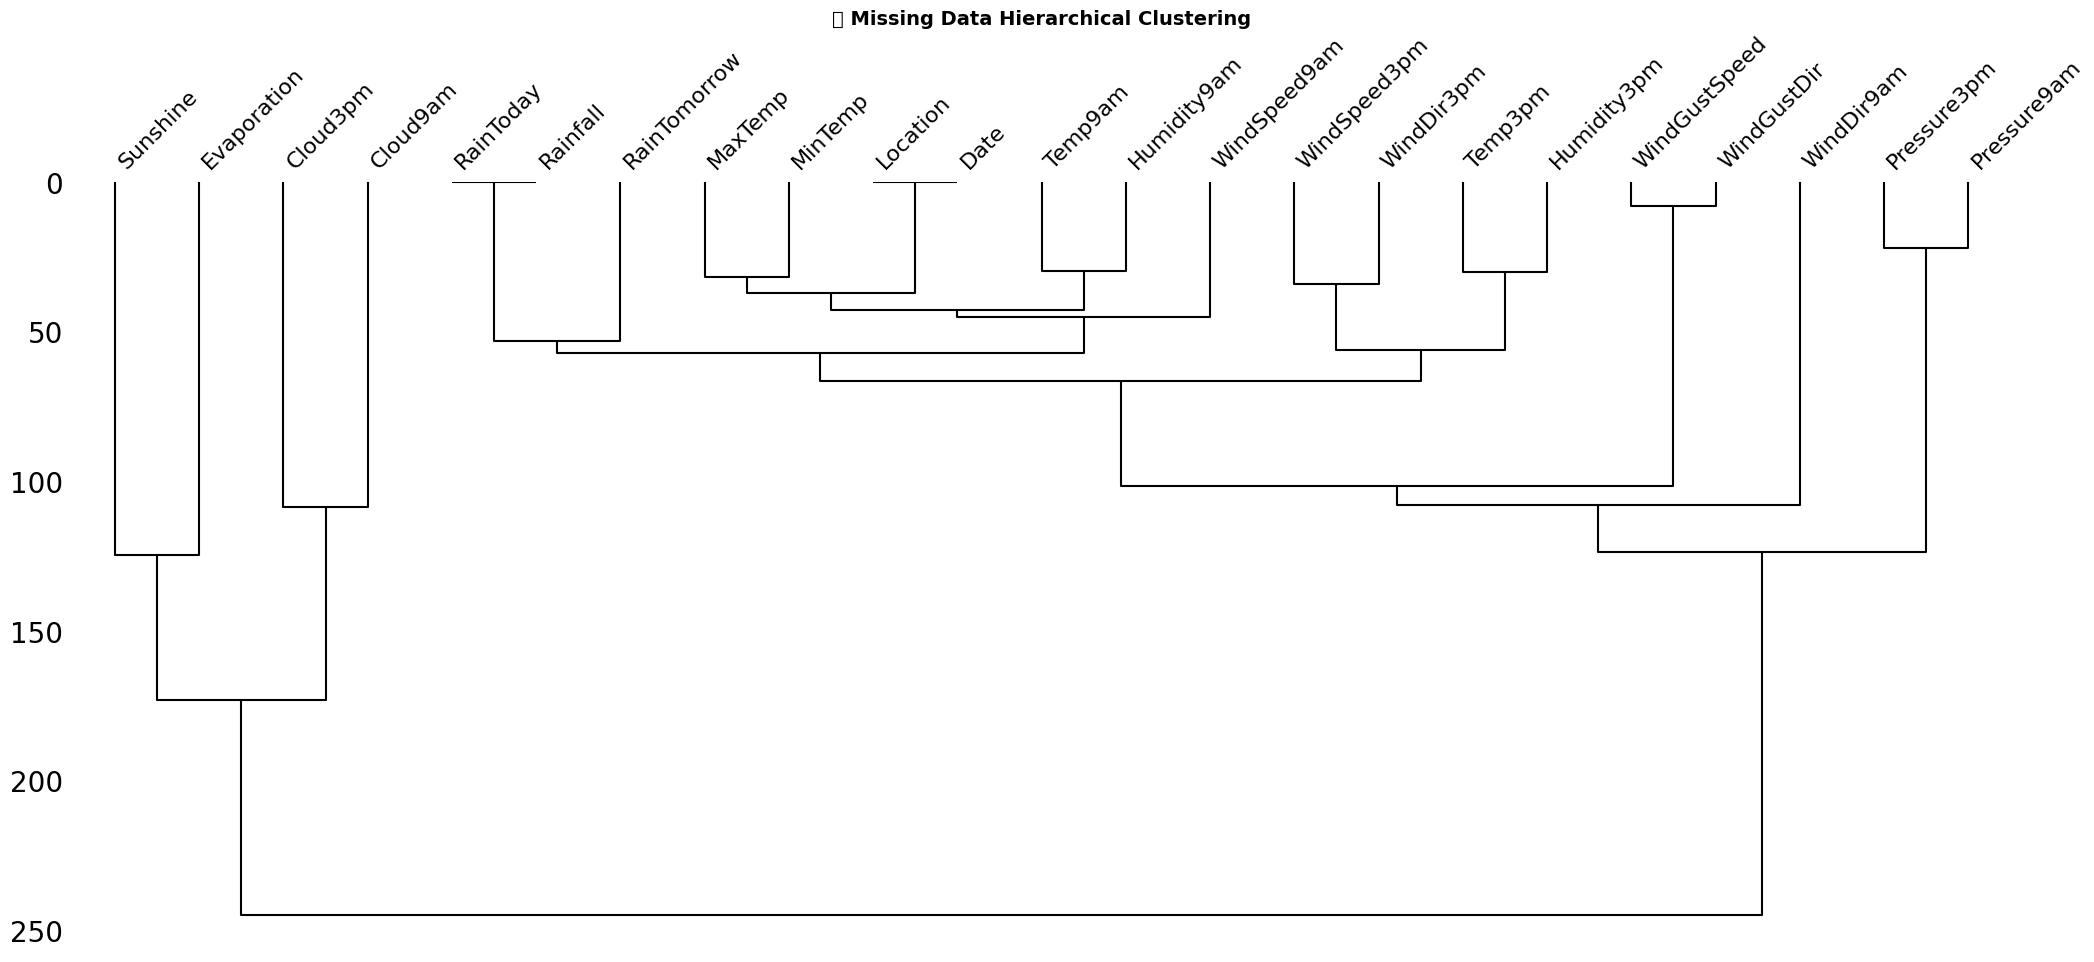

In [7]:
import missingno as msno

plt.figure(figsize=(12, 6), dpi=150)
msno.dendrogram(data)
plt.title("📈 Missing Data Hierarchical Clustering", fontsize=14, fontweight='bold')
plt.show()


# CATEGORICAL FEATURES PICTORIALLY

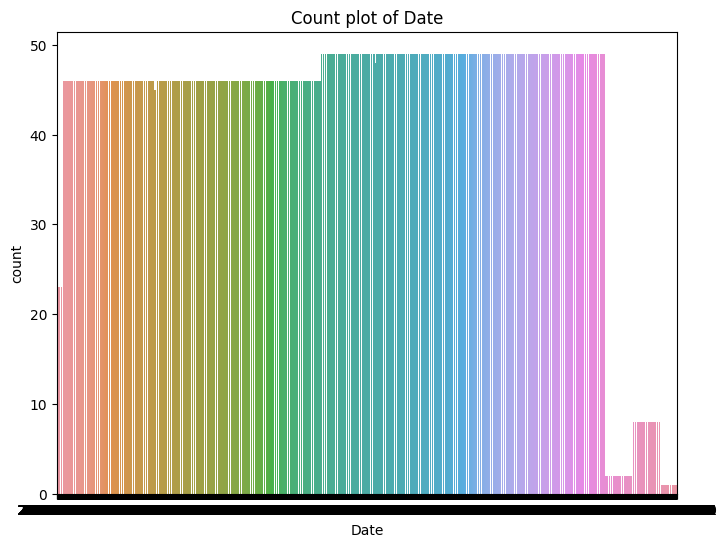

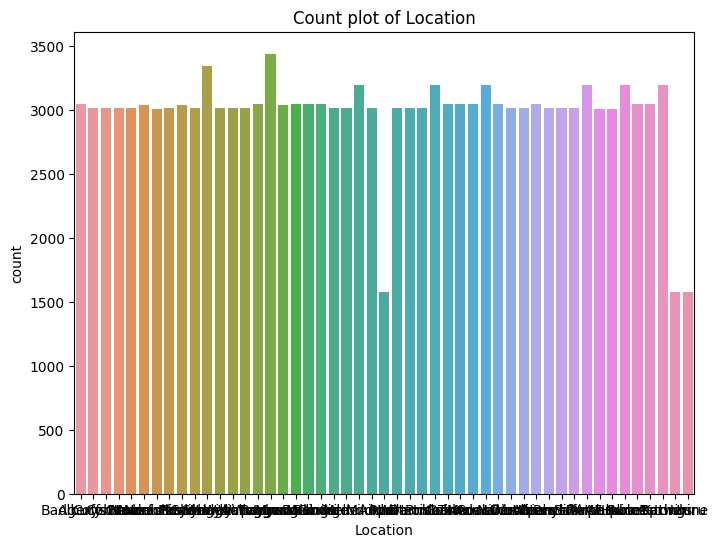

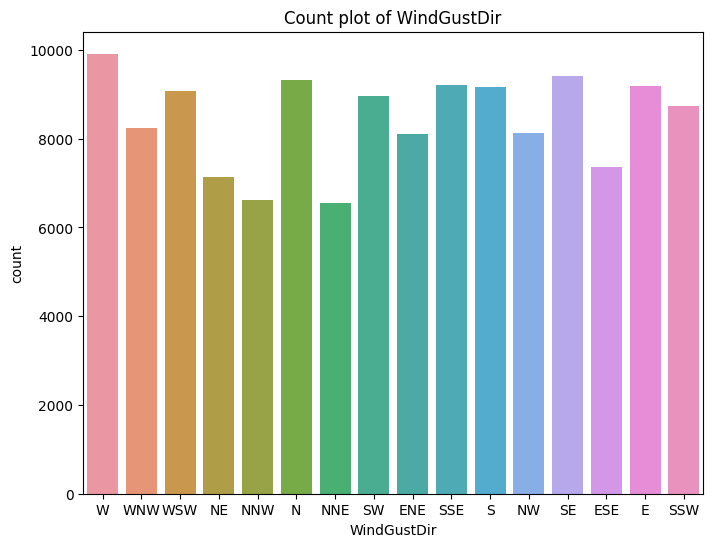

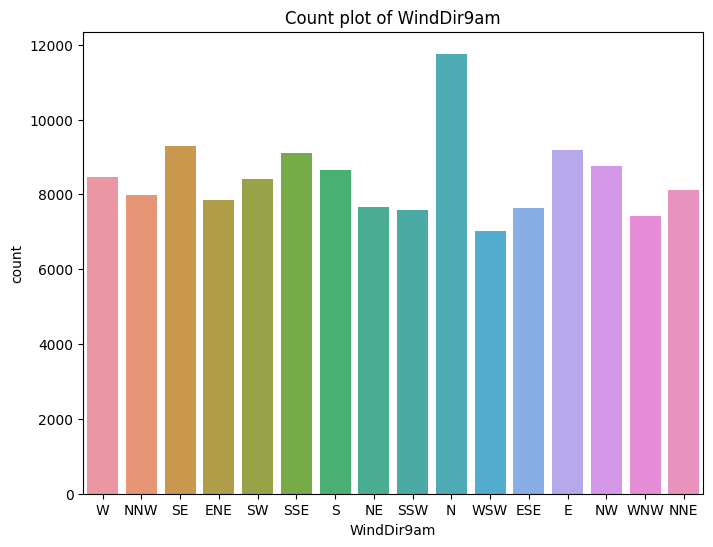

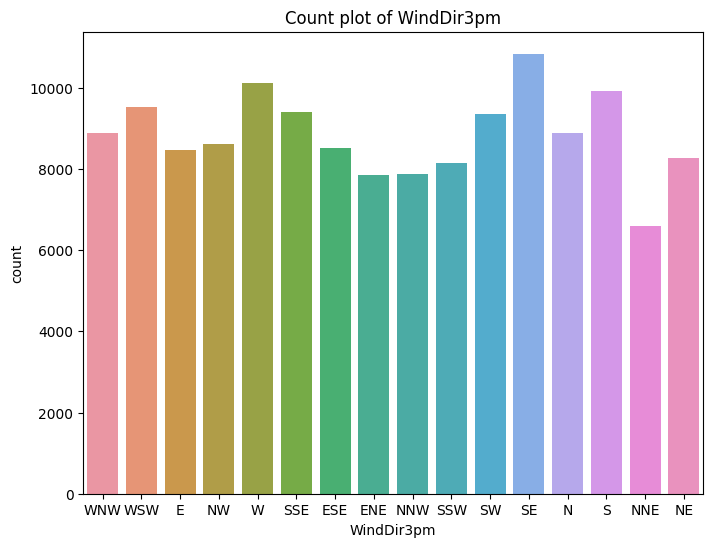

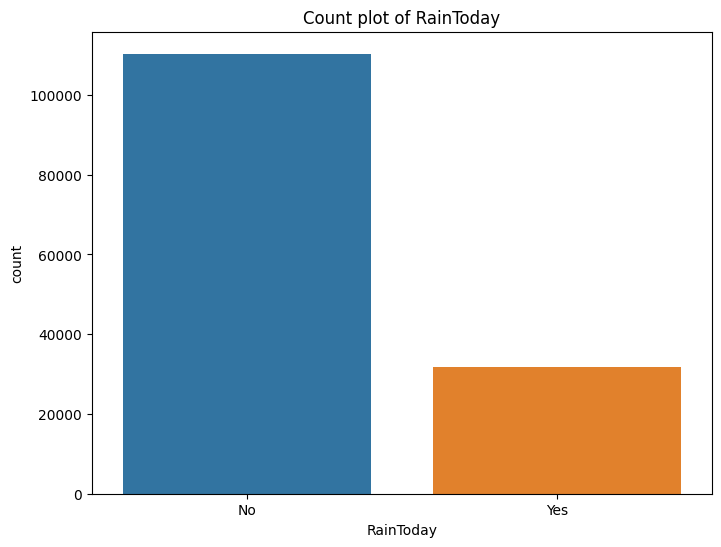

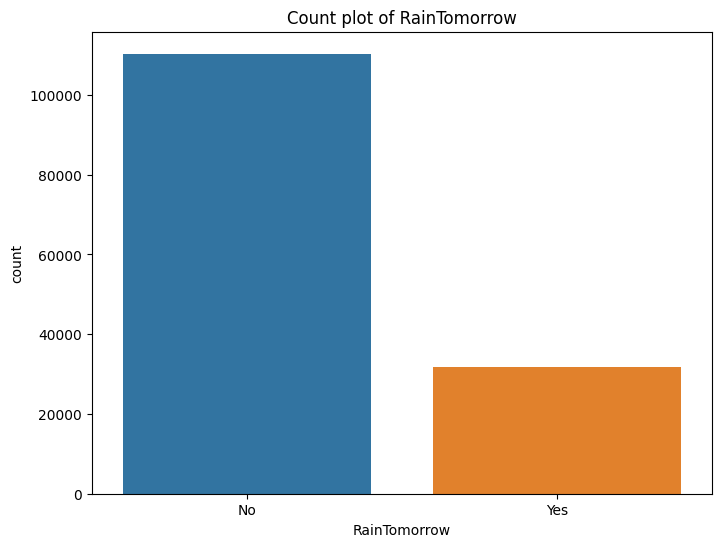

In [8]:
# **Categorical Features (if applicable)**
# For categorical features, you can look at the distribution of the categories
categorical_columns = data.select_dtypes(include=[object]).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=data[col])
    plt.title(f'Count plot of {col}')
    plt.show()


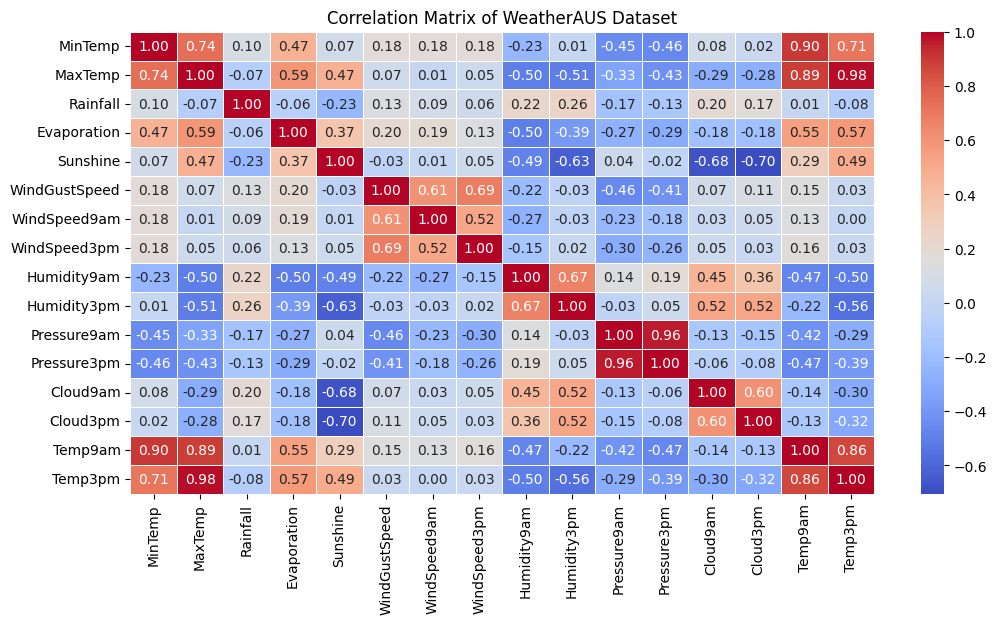

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/weather-australia/weatherAUS.csv')

# Compute correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of WeatherAUS Dataset")
plt.show()


# PIE CHART OF TOMORROW RAIN PREDICTION

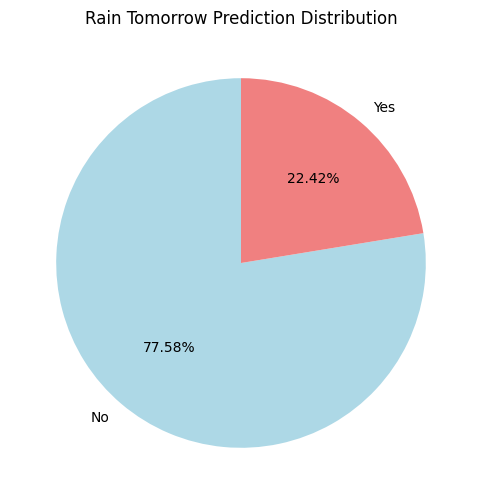

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset (replace 'weatherAUS.csv' with your file path)
df = pd.read_csv('/kaggle/input/weather-australia/weatherAUS.csv')

# Count the values for "Yes" and "No"
rain_counts = df['RainTomorrow'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(rain_counts, labels=rain_counts.index, autopct='%1.2f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Rain Tomorrow Prediction Distribution')
plt.show()


# PIE CHART OF RAINTODAY PREDICTION 

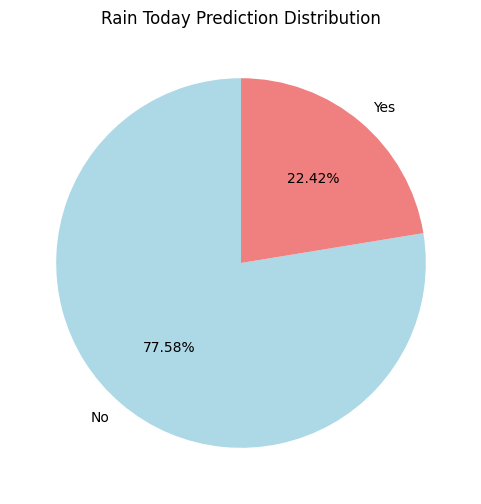

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset (replace 'weatherAUS.csv' with your file path)
df = pd.read_csv('/kaggle/input/weather-australia/weatherAUS.csv')

# Count the values for "Yes" and "No"
rain_counts = df['RainToday'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(rain_counts, labels=rain_counts.index, autopct='%1.2f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Rain Today Prediction Distribution')
plt.show()


# HANDLING MISSING VALUES FOR CONTINUOUS FEATURES

In [13]:
num_col = [num_col for num_col in df.columns if df[num_col].dtype !="O"] 
#numerical features extraction from the data 

In [14]:
missing_num = df[num_col].isnull().sum()    # counting missing values in each  num_feature 
missing_num

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'MinTemp'),
  Text(1, 0, 'MaxTemp'),
  Text(2, 0, 'Rainfall'),
  Text(3, 0, 'Evaporation'),
  Text(4, 0, 'Sunshine'),
  Text(5, 0, 'WindGustSpeed'),
  Text(6, 0, 'WindSpeed9am'),
  Text(7, 0, 'WindSpeed3pm'),
  Text(8, 0, 'Humidity9am'),
  Text(9, 0, 'Humidity3pm'),
  Text(10, 0, 'Pressure9am'),
  Text(11, 0, 'Pressure3pm'),
  Text(12, 0, 'Cloud9am'),
  Text(13, 0, 'Cloud3pm'),
  Text(14, 0, 'Temp9am'),
  Text(15, 0, 'Temp3pm')])

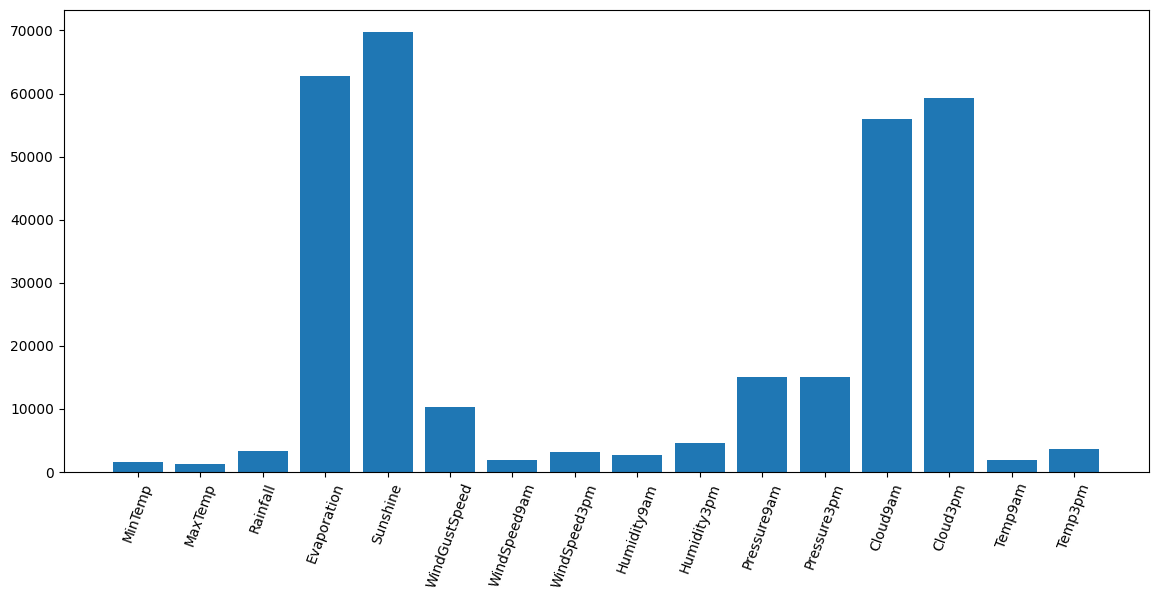

In [15]:
plt.figure(figsize=(14,6))
plt.bar(missing_num.index,missing_num.values)    # ploting missing values 
plt.xticks(rotation=70)

In [16]:
num_col_with_null_values = [col for col in num_col if df[col].isnull().sum()]
missing_values = df[num_col_with_null_values].isnull().sum()
missing_values

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

<Axes: >

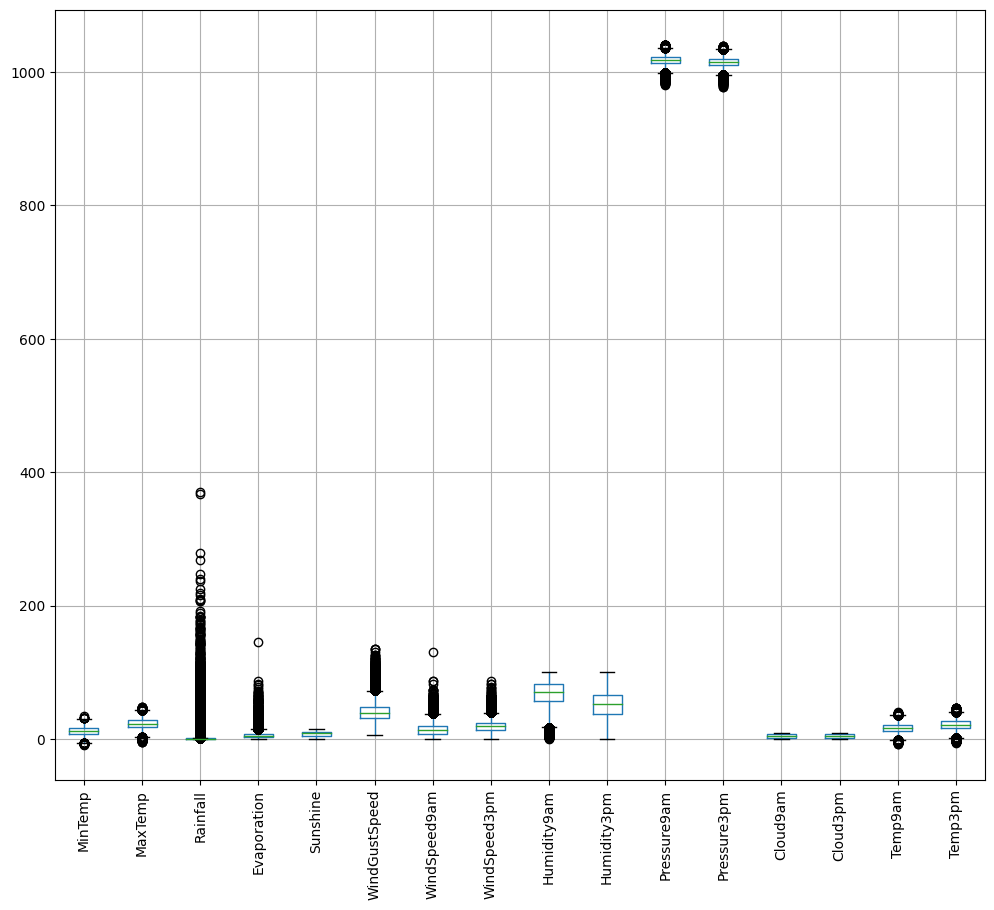

In [17]:
# we can not directly impute missing values by using mean becuase there could be a chance of outliers in the data 
# lets check by box plot 
plt.figure(figsize=(12,10))
df.boxplot(num_col_with_null_values,rot = 90)

In [18]:
# Remove Outliers from Numerical Features 

features_with_outliers = num_col_with_null_values
for feature in features_with_outliers:
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  df.loc[df[feature]<lower_limit, feature] = lower_limit
  df.loc[df[feature]>upper_limit, feature] = upper_limit

# after running this the outliers will be removed from our numerical features of the data 

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: Ru

<Axes: >

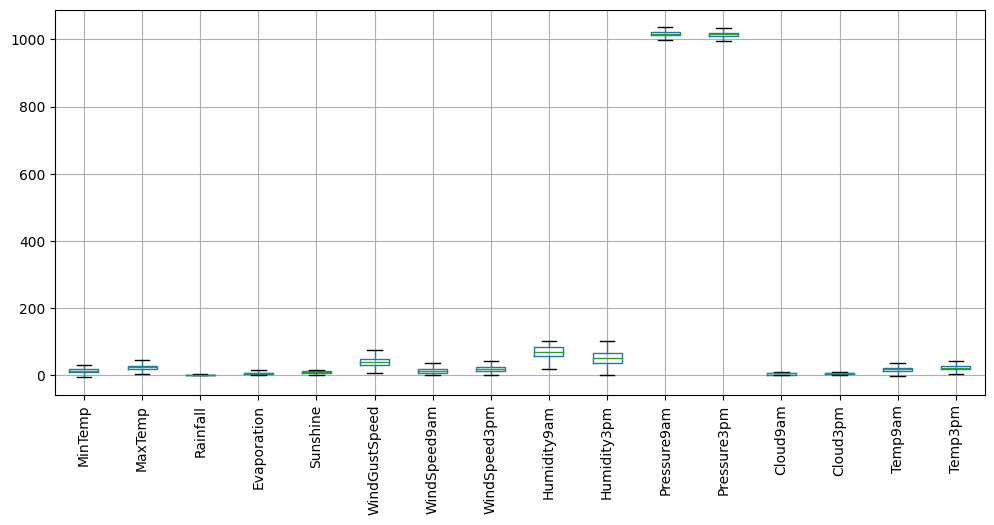

In [19]:
plt.figure(figsize=(12,5))
df.boxplot(num_col_with_null_values,rot = 90)    # we can see there is no outliers now 

# EXPLORING NUMERICAL VARIABLES

In [22]:
# Exploring Numerical Variables

df_num = df.select_dtypes(include = ['float64'])
df_num.head()
df_num.columns


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

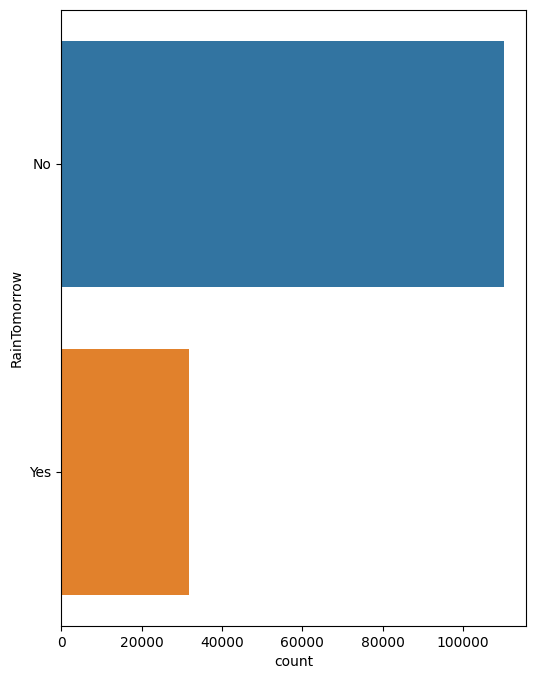

(145460, 7)

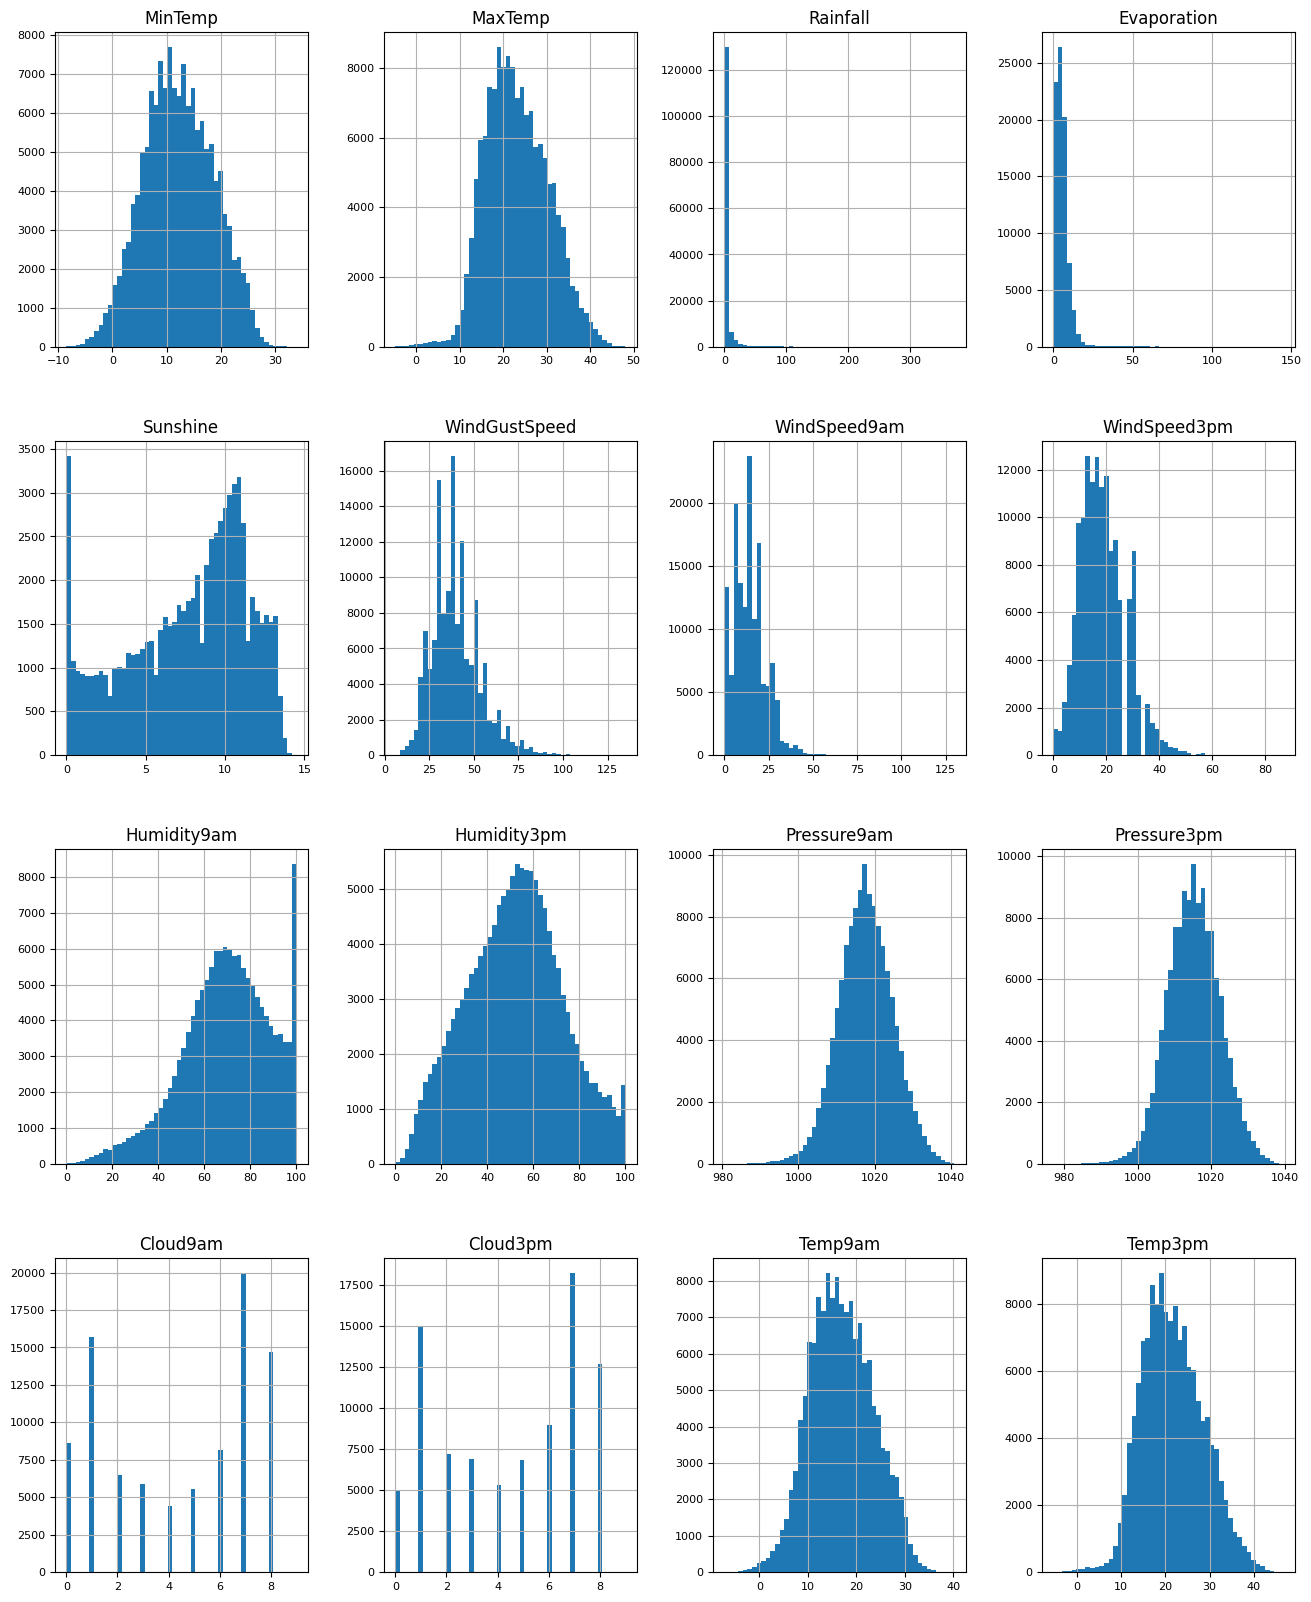

In [23]:
df_num.shape

df['RainTomorrow'].unique()

#View the Frequency Distribution
df['RainTomorrow'].value_counts()

f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(y="RainTomorrow", data=df)
plt.show()

# Histogram for Numerical Variables

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Exploring Categorical Variables

df_cat = df.select_dtypes(include = ['O'])
df_cat.head()

df_cat.shape

# EXPLORING TARGET VARIABLES

<Axes: xlabel='RainTomorrow', ylabel='count'>

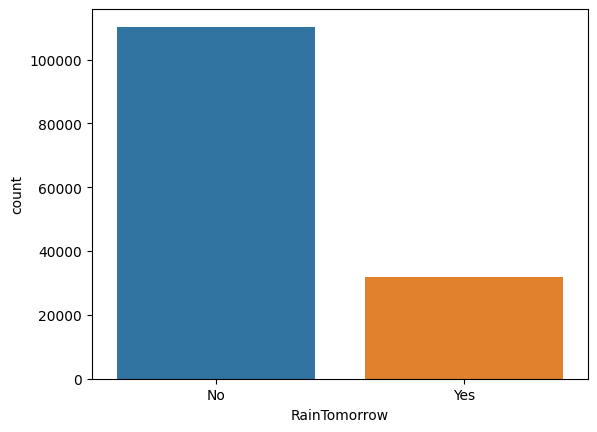

In [24]:
# Exploring Targeted Variable 

sns.countplot(x="RainTomorrow", data=df)


# we can see there is more numbers of "no" values and it is imbalanced data 
# Although we can balance it but there is no need because it is actuall demographics 

# DISTRIBUTION OF ALL FEATURES AGAINST TARGET VARIABLE

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

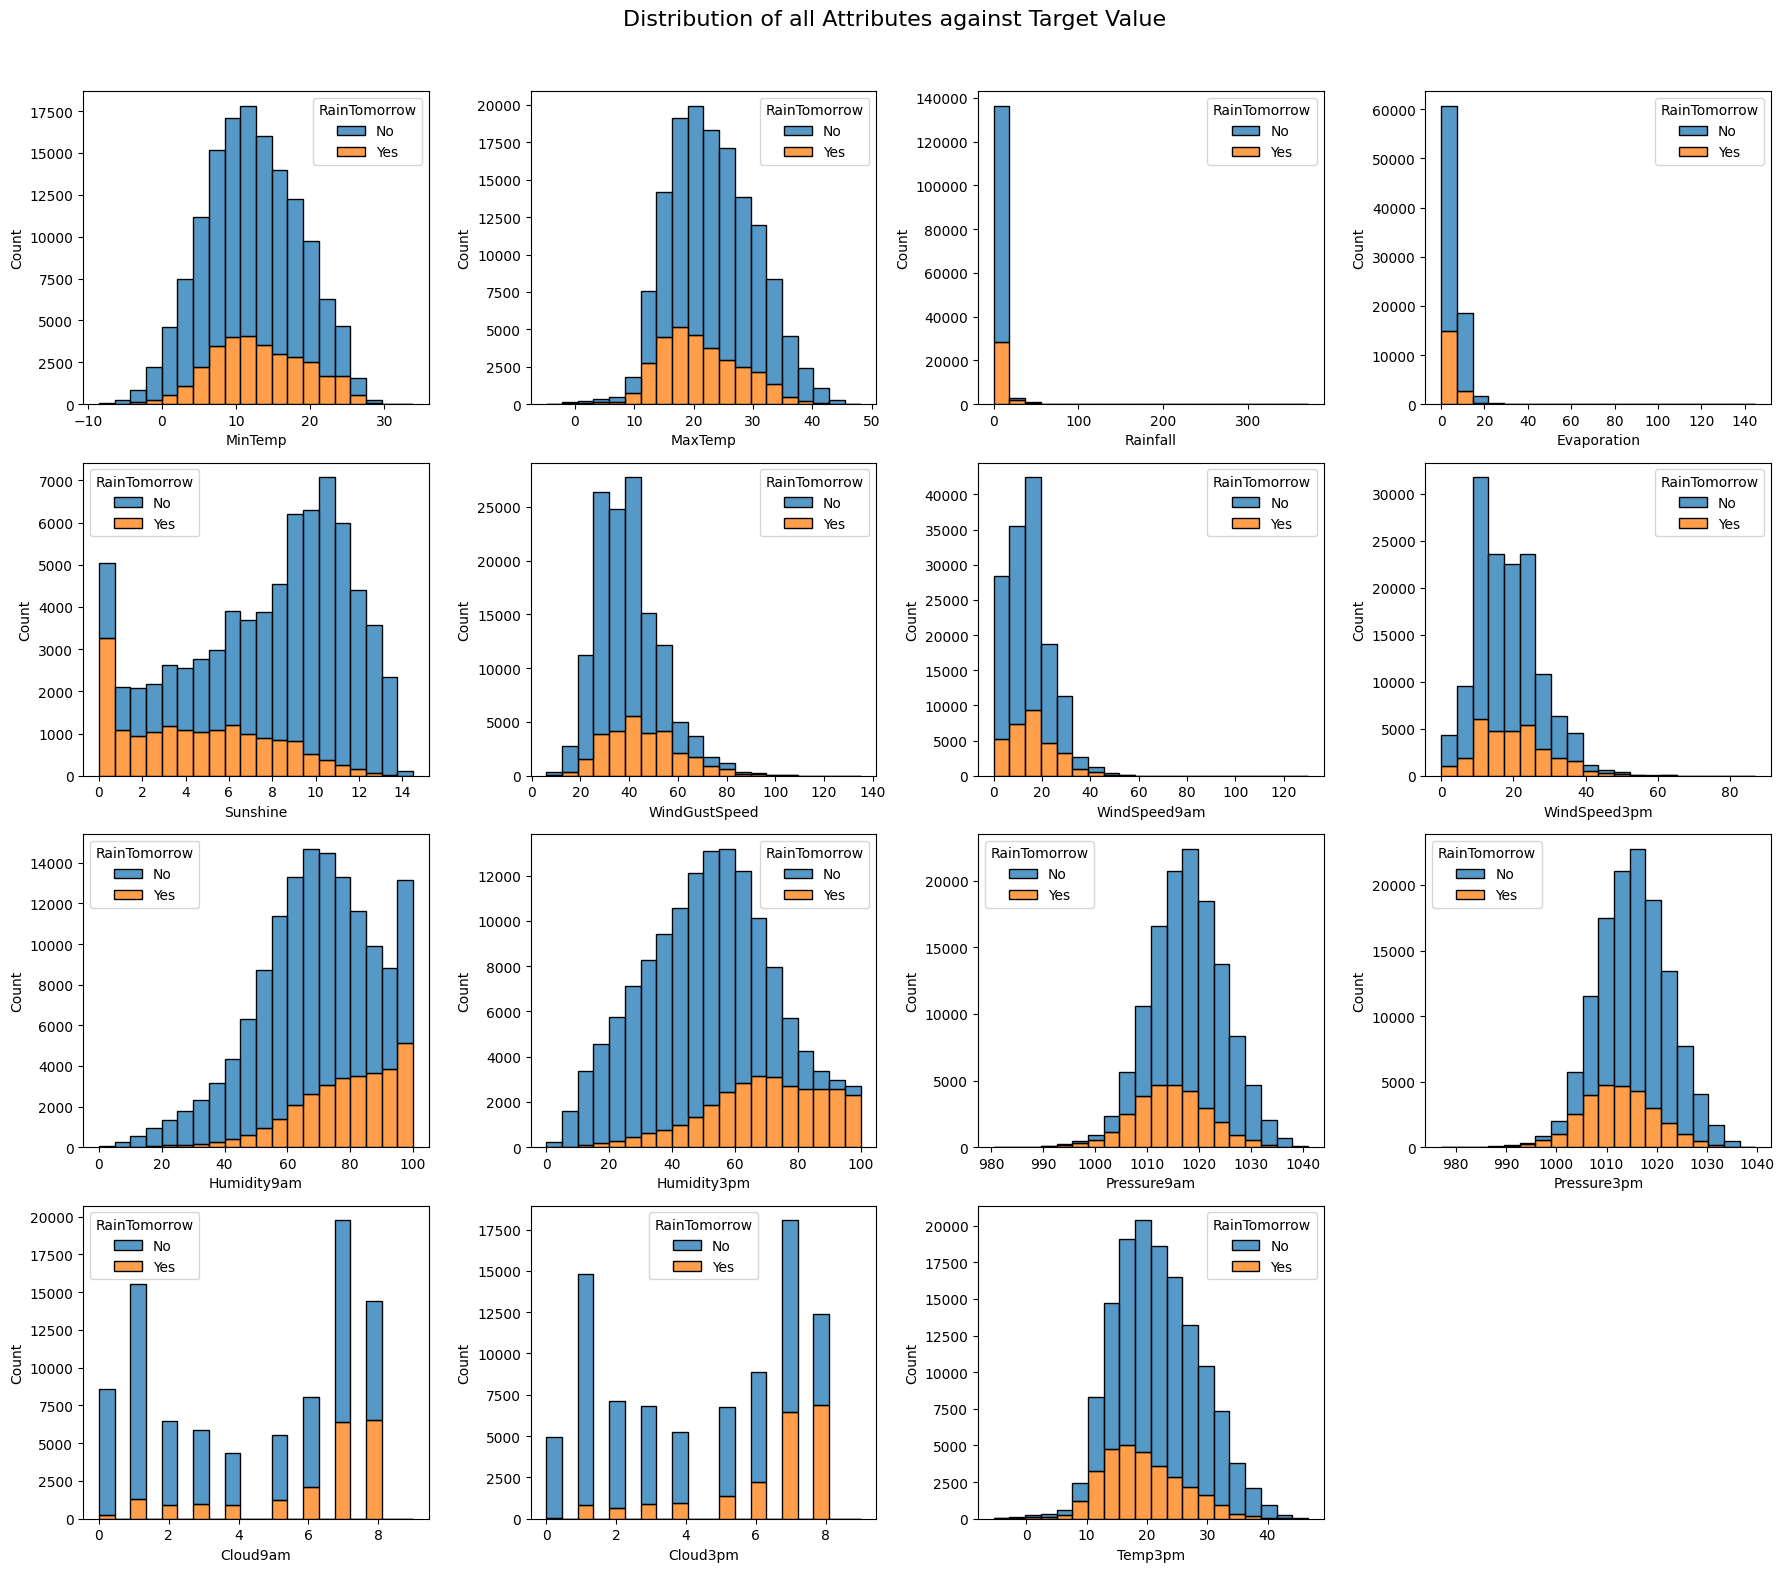

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with your dataset)
df = pd.read_csv('/kaggle/input/weather-australia/weatherAUS.csv')

# Select numerical features
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                      'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                      'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm']

# Set figure size
plt.figure(figsize=(18, 16))
plt.suptitle("Distribution of all Attributes against Target Value", fontsize=16)

# Loop through each feature to create subplots
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)  # Create a 4x4 grid of subplots
    sns.histplot(data=df, x=feature, hue="RainTomorrow", bins=20, kde=False, multiple="stack")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
